In [1]:
from sklearn.datasets.samples_generator import make_blobs
X_raw, y_raw = make_blobs(n_samples=100, centers=2, cluster_std=5.2, random_state=42)

In [2]:
import numpy as np
X = X_raw.astype(np.float32)

In [3]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, dtype=np.float32)
y = enc.fit_transform(y_raw.reshape(-1, 1))

In [4]:
import cv2
mlp = cv2.ml.ANN_MLP_create()

In [5]:
n_input = 2
n_hidden = 8
n_output = 2
mlp.setLayerSizes(np.array([n_input, n_hidden, n_output]))

In [6]:
mlp.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM, 2.5, 1.0)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Text(0,0.5,'y')

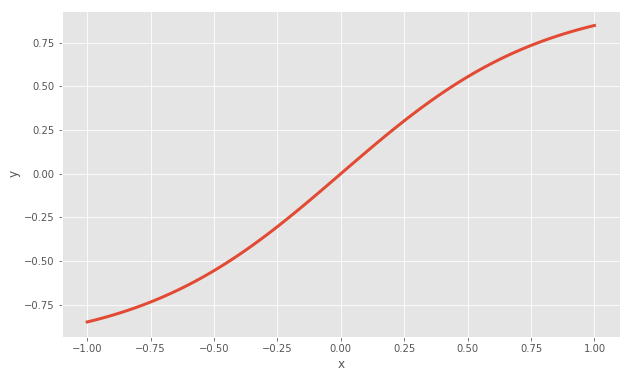

In [8]:
alpha = 2.5
beta = 1.0
x_sig = np.linspace(-1.0, 1.0, 100)
y_sig = beta * (1.0 - np.exp(-alpha * x_sig))
y_sig /= (1 + np.exp(-alpha * x_sig))
plt.figure(figsize=(10, 6))
plt.plot(x_sig, y_sig, linewidth=3)
plt.xlabel('x')
plt.ylabel('y')

In [9]:
mlp.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)

In [10]:
term_mode = cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS
term_max_iter = 300
term_eps = 0.01
mlp.setTermCriteria((term_mode, term_max_iter, term_eps))

In [11]:
mlp.train(X, cv2.ml.ROW_SAMPLE, y)

True

In [12]:
_, y_hat = mlp.predict(X)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_hat.round(), y)

0.84

In [14]:
def plot_decision_boundary(classifier, X_test, y_test):
    
    h = 0.02  
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    _, zz = classifier.predict(X_hypo)
    zz = np.argmax(zz, axis=1)
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)

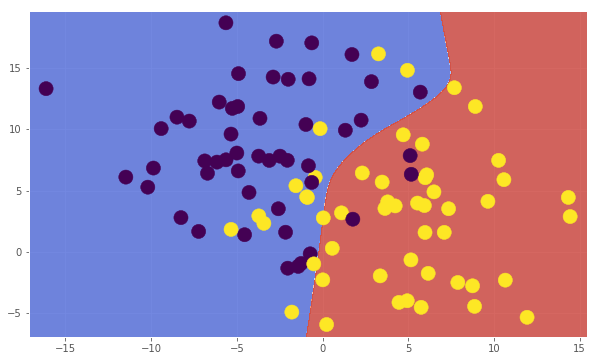

In [15]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(mlp, X, y_raw)